In [ ]:
# Cargar dependencias.
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb

# Clustering.
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.metrics import pairwise_distances_argmin_min

# Normalizar.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import silhouette_score

# Graficar en 3D.
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (12, 5)
plt.style.use('ggplot')


In [ ]:
# Subir el dataset.
from google.colab import files
import io

uploaded = files.upload()
Base_de_datos = pd.read_csv(io.BytesIO(uploaded["CollegeScorecard.csv"]))

Saving CollegeScorecard.csv to CollegeScorecard.csv


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7,9,1427,1542,1561,1575) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
Base_de_datos.head()

,UNITID,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,AccredAgency,INSTURL,NPCURL,...,COMPL_RPY_3YR_RT_SUPP,NONCOM_RPY_3YR_RT_SUPP,DEP_RPY_3YR_RT_SUPP,IND_RPY_3YR_RT_SUPP,PELL_RPY_3YR_RT_SUPP,NOPELL_RPY_3YR_RT_SUPP,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,galileo.aamu.edu/netpricecalculator/npcalc.htm,...,0.578873239,0.373790022,0.442857143,0.45890411,0.443586698,0.452513966,0.484818805,0.406,0.423580786,0.44245283
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,www.collegeportraits.org/AL/UAB/estimator/agree,...,0.847800926,0.678748759,0.767798013,0.739164697,0.732297853,0.795454545,0.760521886,0.755344418,0.751552795,0.765074771
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,tcc.noellevitz.com/(S(miwoihs5stz5cpyifh4nczu0...,...,0.807692308,0.61328125,PrivacySuppressed,0.641114983,0.600877193,0.775,0.610465116,0.686567164,0.632653061,0.65
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.892045455,0.689788054,0.800347222,0.75564409,0.738341969,0.851405622,0.768378651,0.79844098,0.778156997,0.791666667
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/email/index.aspx,www.alasu.edu/cost-aid/forms/calculator/index....,...,0.482490272,0.315996848,0.32410212,0.350993377,0.320016821,0.380829016,0.364423718,0.286530612,0.315737052,0.334633385


In [ ]:

bd1=Base_de_datos.copy()
Base_de_datos.shape

(7804, 1725)

In [ ]:
bd1.dropna(thresh = bd1.shape[0]*1, how = 'all', axis = 1, inplace = True)

In [ ]:
bd1.shape

(7804, 16)

In [ ]:
bd1.head()

,UNITID,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,HCM2,main,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,st_fips,region,CURROPER
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,0,1,1,3,4,1,1,5,1
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,0,1,1,3,4,1,1,5,1
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,0,1,1,3,4,2,1,5,1
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,0,1,1,3,4,1,1,5,1
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,0,1,1,3,4,1,1,5,1


In [ ]:
bd1.describe()

,UNITID,OPEID,opeid6,HCM2,main,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,st_fips,region,CURROPER
count,7.804000e+03,7.804000e+03,7804.000000,7804.000000,7804.000000,7804.000000,7804.000000,7804.00000,7804.000000,7804.000000,7804.000000,7804.000000
mean,1.705430e+06,2.032428e+06,16121.271271,0.008842,0.731548,8.334956,1.788954,2.17632,2.216427,28.961558,4.620835,0.953485
std,6.789848e+06,4.281088e+06,13663.764753,0.093619,0.443182,24.068238,1.034792,1.31764,0.837223,16.669313,2.171166,0.210610
min,1.006540e+05,1.002000e+05,1002.000000,0.000000,0.000000,1.000000,0.000000,0.00000,1.000000,1.000000,0.000000,0.000000
25%,1.743918e+05,3.455750e+05,3439.750000,0.000000,0.000000,1.000000,1.000000,1.00000,1.000000,13.000000,3.000000,1.000000
50%,2.306000e+05,1.063100e+06,10490.000000,0.000000,1.000000,1.000000,2.000000,2.00000,2.000000,29.000000,5.000000,1.000000
75%,4.462262e+05,2.616779e+06,25785.000000,0.000000,1.000000,3.000000,3.000000,4.00000,3.000000,42.000000,6.000000,1.000000
max,4.828571e+07,8.209882e+07,42264.000000,1.000000,1.000000,141.000000,4.000000,4.00000,3.000000,78.000000,9.000000,1.000000


In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

bd2 = bd1.select_dtypes(include=numerics)

In [ ]:
bd2.shape


(7804, 12)

<function matplotlib.pyplot.show>

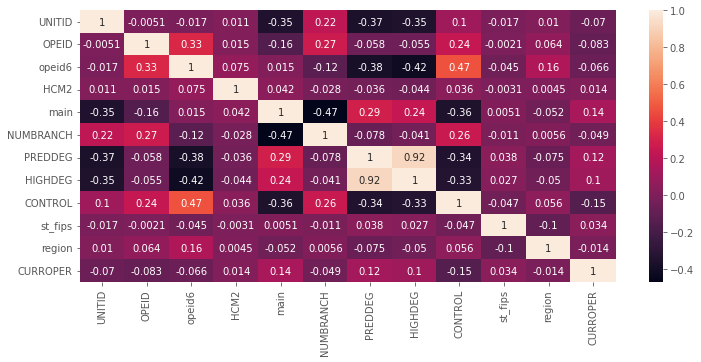

In [ ]:
matrix = bd2.corr()
sb.heatmap(matrix, annot=True)
plt.show

In [ ]:
list(bd2.columns.values.tolist())

['UNITID',
 'OPEID',
 'opeid6',
 'HCM2',
 'main',
 'NUMBRANCH',
 'PREDDEG',
 'HIGHDEG',
 'CONTROL',
 'st_fips',
 'region',
 'CURROPER']

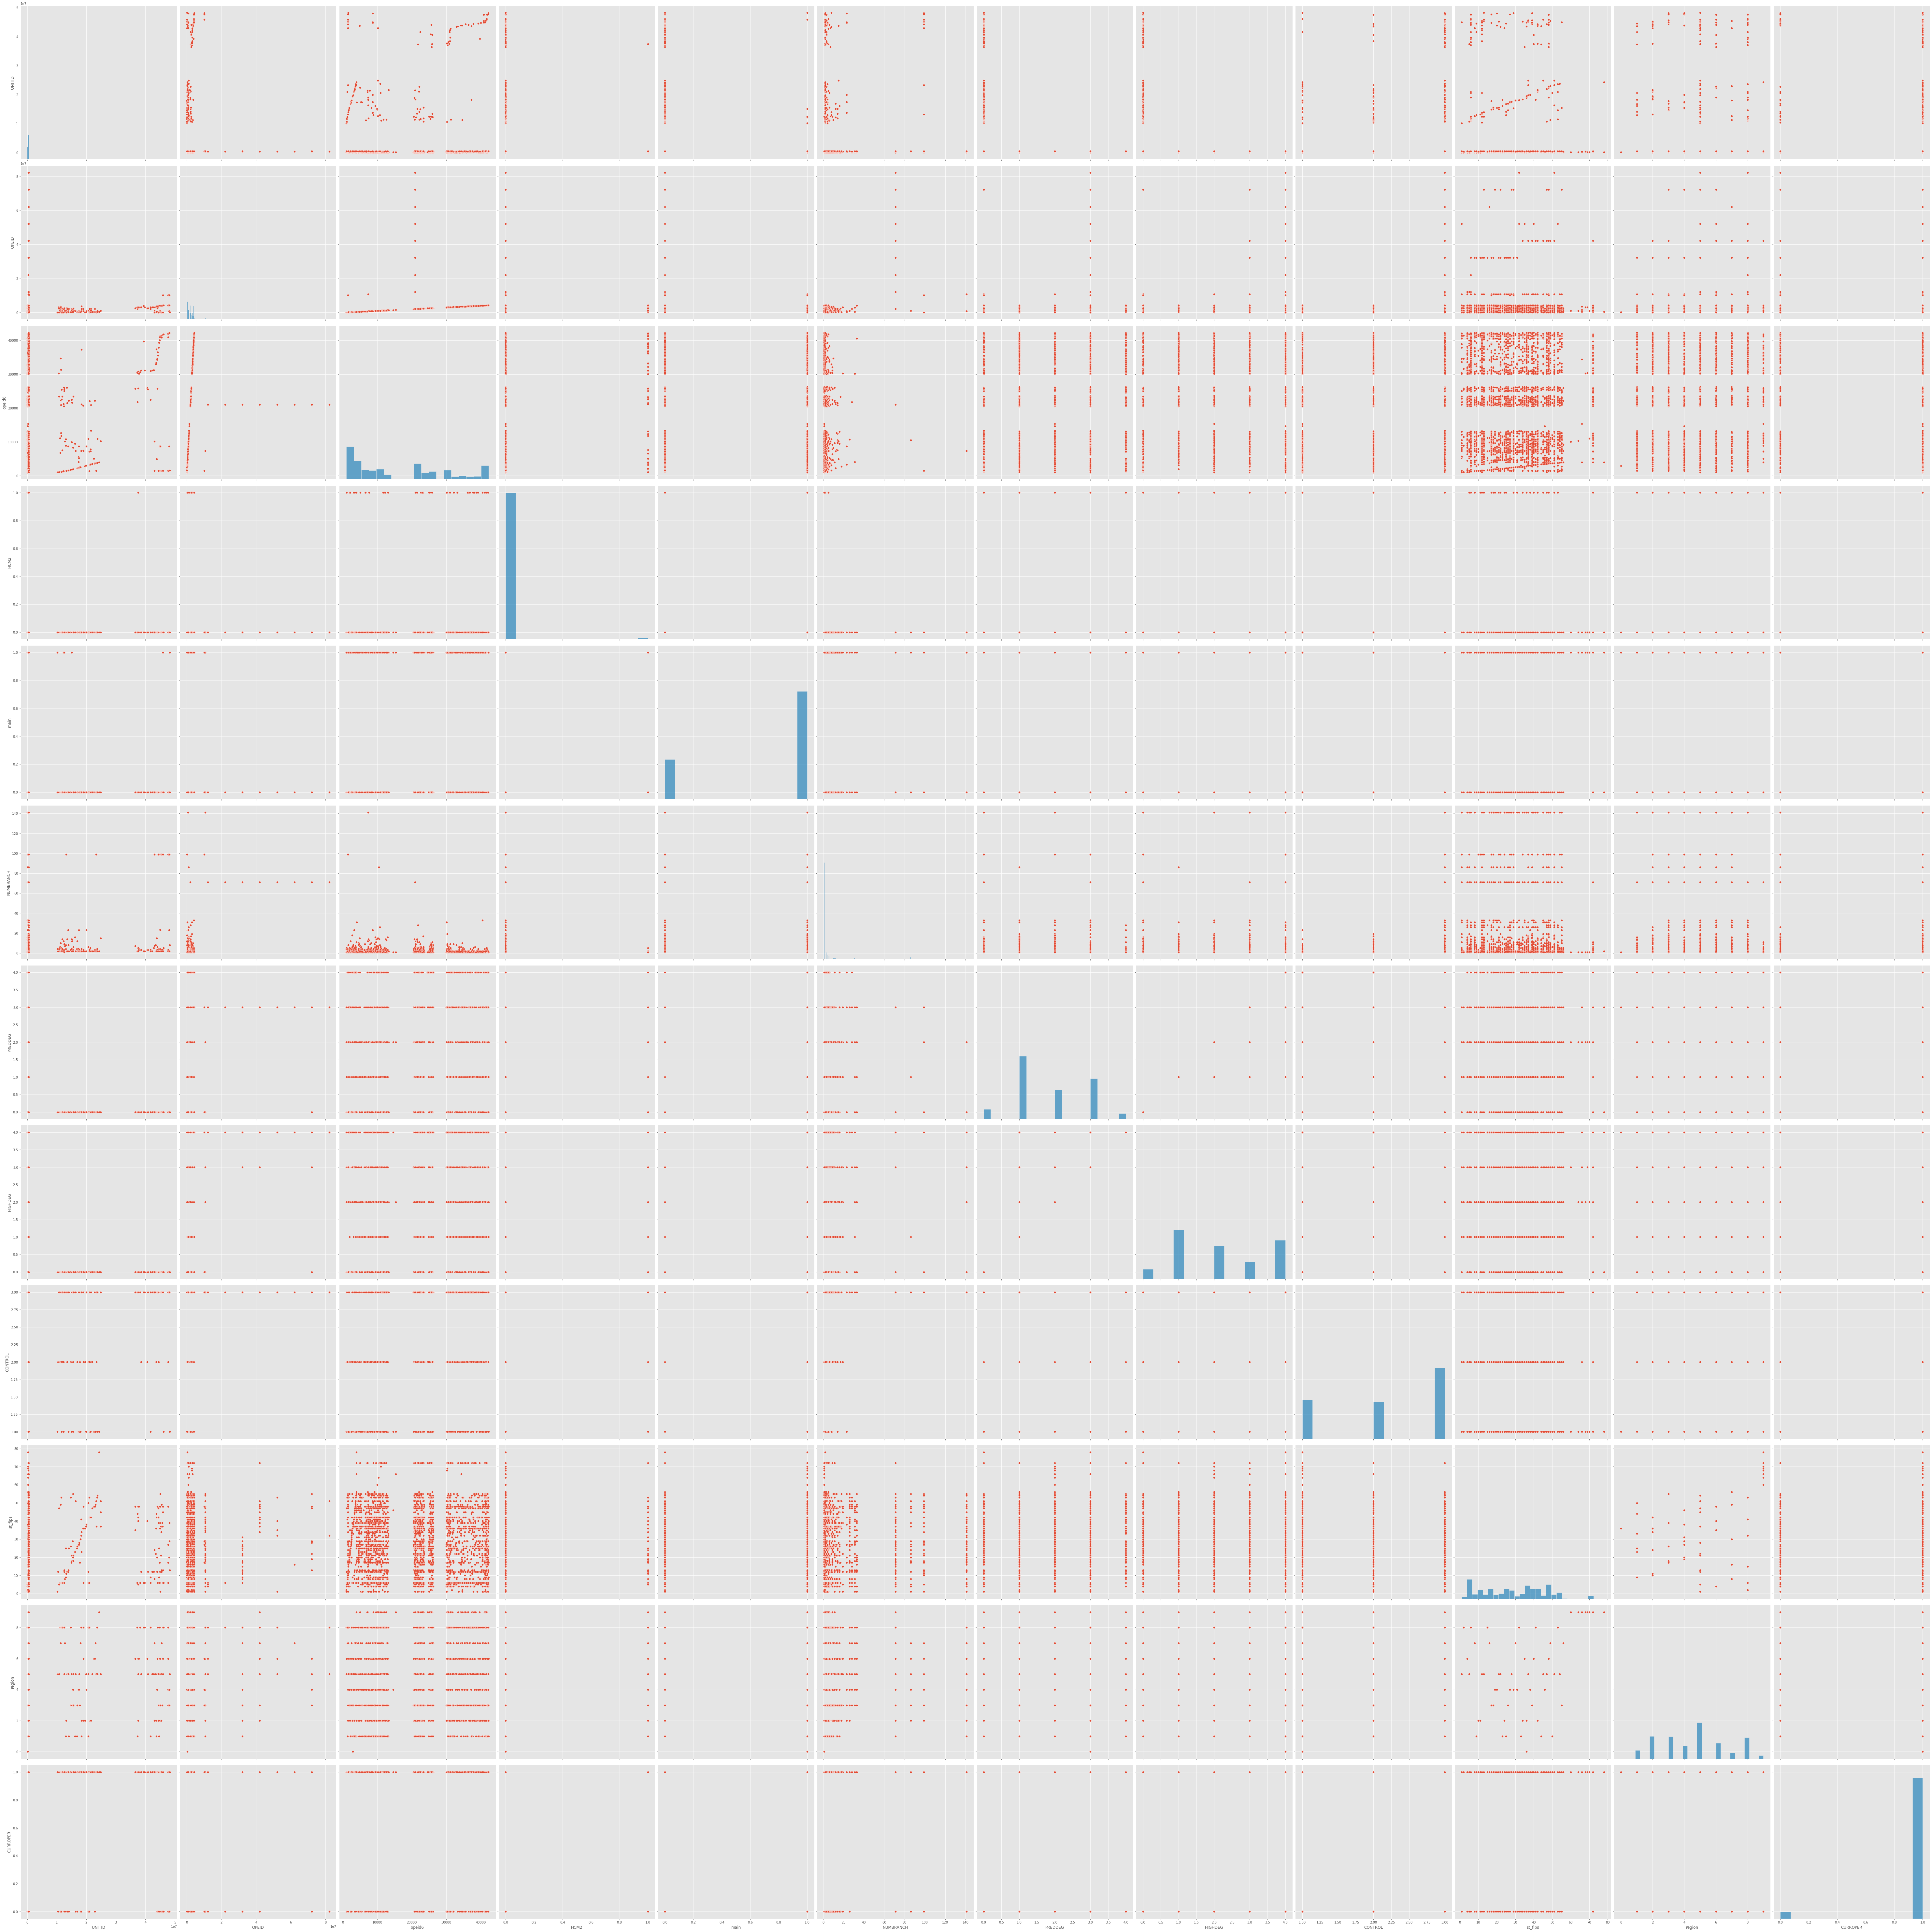

In [ ]:
sb.pairplot(bd2.dropna(),
            height=7,
            vars=['UNITID',
 'OPEID',
 'opeid6',
 'HCM2',
 'main',
 'NUMBRANCH',
 'PREDDEG',
 'HIGHDEG',
 'CONTROL',
 'st_fips',
 'region',
 'CURROPER'],
            kind='scatter')
plt.show()


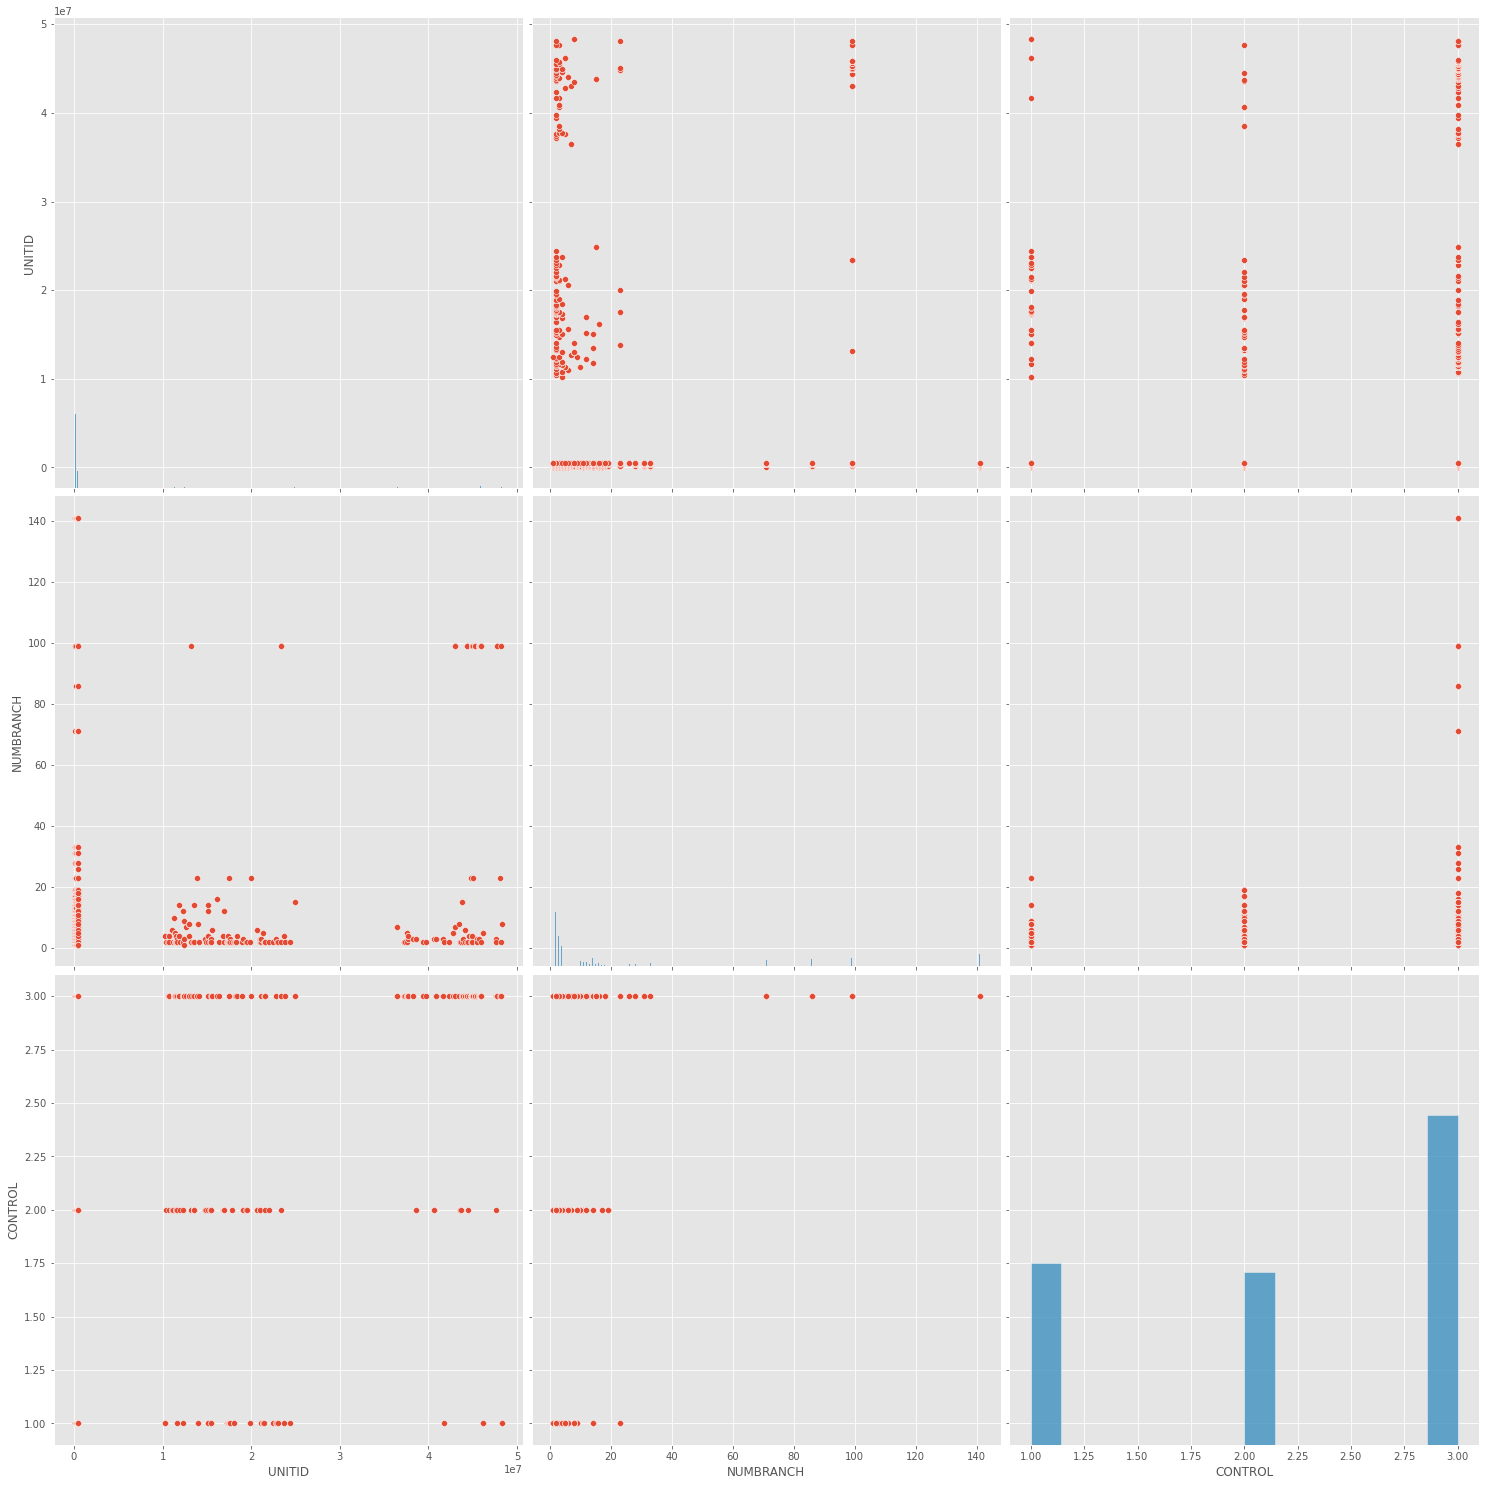

In [ ]:
sb.pairplot(bd2.dropna(),
            height=7,
            vars=[
 'st_fips',
 'NUMBRANCH',
 'CONTROL'],
            kind='scatter')
plt.show()

In [ ]:
semillas_2=bd2.drop(columns=['UNITID',
 'OPEID',
 'opeid6',
 'HCM2',
 'main',
 'NUMBRANCH',
 'PREDDEG',
 'st_fips',
 'CURROPER'],)


In [ ]:
bd2_norm=(semillas_2-semillas_2.min())/(semillas_2.max()-semillas_2.min())

In [17]:
semillas_3D = np.array(bd2[['HIGHDEG','region','CONTROL']])

print(semillas_3D.shape)


(7804, 3)


In [18]:
length = np.sqrt((bd2**2).sum(axis=1))[:,None]
rr = bd2 / length


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


In [19]:
semillas_3D2 =np.sqrt((semillas_3D**2).sum(axis=1))[:,None]
X = semillas_3D / semillas_3D2

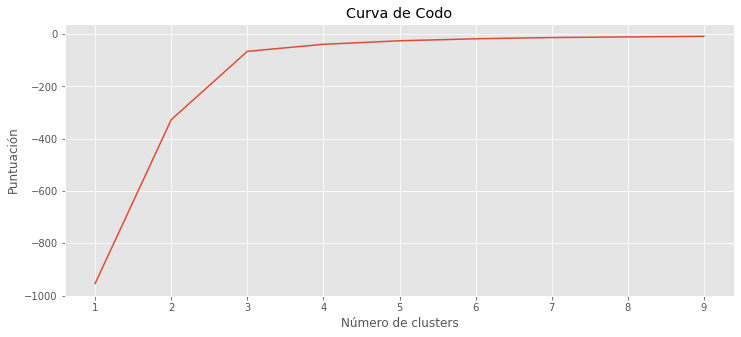

In [20]:
# Curva de Codo
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(rr).score(rr) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Número de clusters')
plt.ylabel('Puntuación')
plt.title('Curva de Codo')
plt.show()



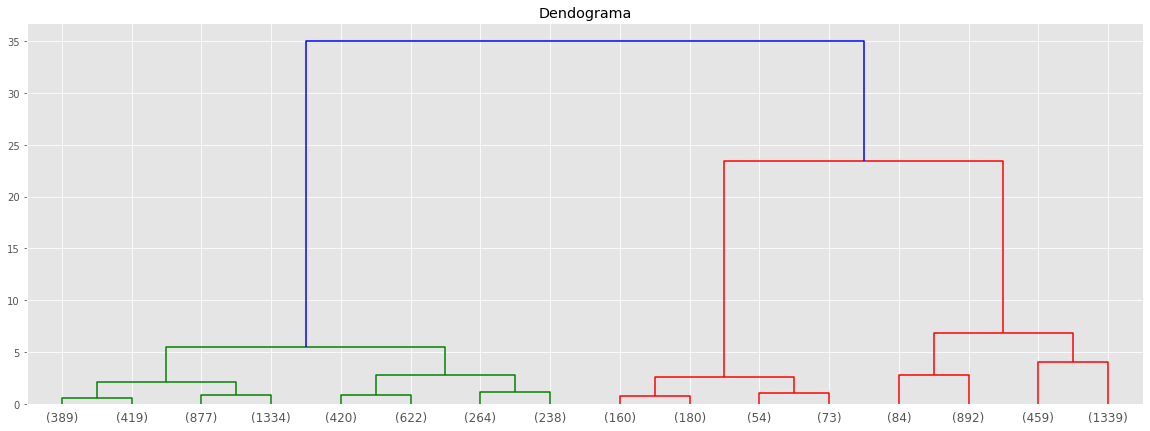

In [21]:
plt.figure(figsize=(20,7))
plt.title('Dendograma')
dend=sch.dendrogram(sch.linkage(rr,method='ward'),truncate_mode='level',p=3)


In [22]:
# nrefs es la cantidad de datos ("datasets") de referencia contra los que se va a comparar
def optimalK(data, nrefs=3, maxClusters=15):

    gaps = np.zeros((len(range(1, maxClusters+1)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters+1)):

        # guardara los resultados de dispersión de cada distribución simulada
        refDisps = np.zeros(nrefs)

        # Genera las muestras aleatorias indicadas con nrefs y ejecuta k-means
        # en cada bucle obteniendo los resultados de dispersión (inercia)
        # para cada conjunto generado.
        for i in range(nrefs):

            # Crea nuevo conjunto aleatorio de referencia
            # Se puede usar una semilla para tener reproducibilidad
            np.random.seed(0)
            randomReference = np.random.random_sample(size=data.shape)

            # se ajusta el modelo al conjunto de referencia
            km = KMeans(k)
            km.fit(randomReference)
            # se guarda la dispersión obtenida
            refDisp = km.inertia_
            refDisps[i] = refDisp

        # Se ajusta el modelo a los datos originales y se guarda su inercia
        km = KMeans(k)
        km.fit(data)

        origDisp = km.inertia_

        # Calcula el estadístico de gap para k clusters usando el promedio de
        # las dispersiones de los datos simulados y la dispersión de los datos originales.
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)

        # Guarda el estadístico de gap obtenido en este bucle.
        gaps[gap_index] = gap

        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)

    # Selecciona el "primer máximo" de los estadísticos obtenidos y devuelve
    # su respectivo número de clusters
    for i in range(0, len(gaps)-1):
      if gaps[i+1] <= gaps[i]:
        return (i+1, resultsdf)
    return (len(gaps), resultsdf)
    #retorna (gaps.argmax() + 1, resultsdf)  # se le suma 1 porque el indice de 0 significa 1 cluster es optimo, indice 2 = 3 clusters son optimos


In [23]:
k, gapdf = optimalK (semillas_3D2, nrefs=5, maxClusters=20)
print('La cantidad óptima de clusters es: ', k)


La cantidad óptima de clusters es:  1


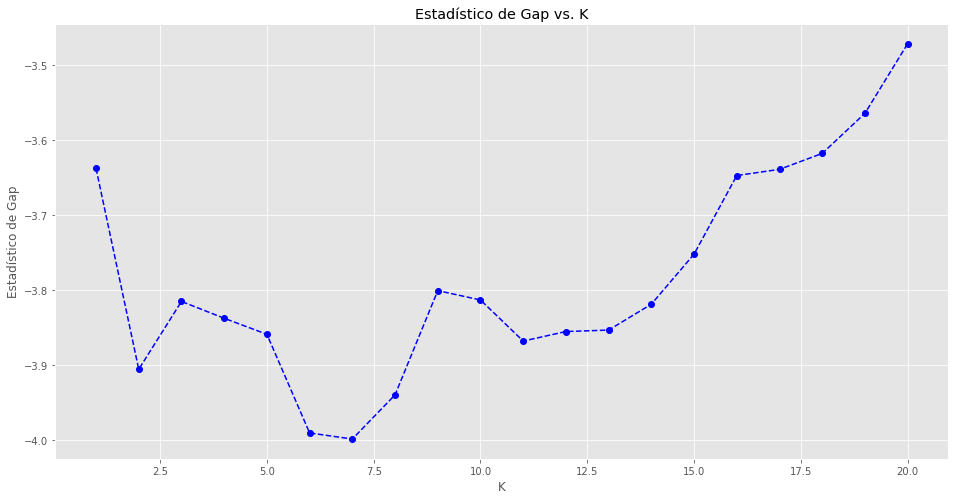

In [29]:
5plt.figure(figsize=(16,8))
plt.plot(gapdf['clusterCount'], gapdf['gap'], linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Estadístico de Gap');
plt.title('Estadístico de Gap vs. K');

para n numero de clusters = 2 el puntaje de silueta promedio es : 0.4042024515009839
para n numero de clusters = 3 el puntaje de silueta promedio es : 0.44056700419984324
para n numero de clusters = 4 el puntaje de silueta promedio es : 0.44464814956718896
para n numero de clusters = 5 el puntaje de silueta promedio es : 0.4485140902480956
para n numero de clusters = 6 el puntaje de silueta promedio es : 0.4297151734808248


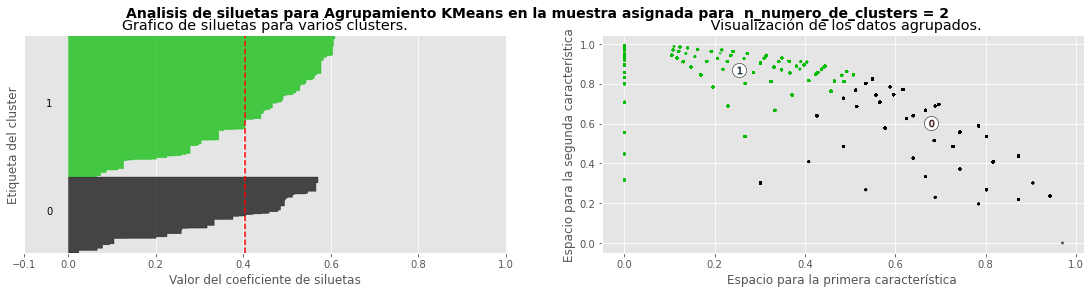

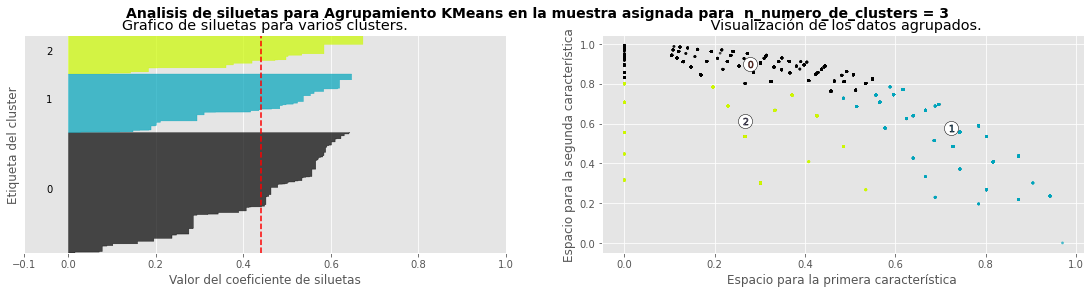

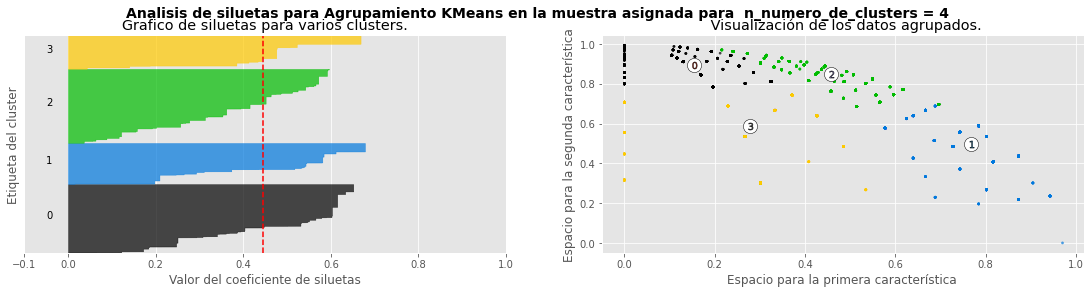

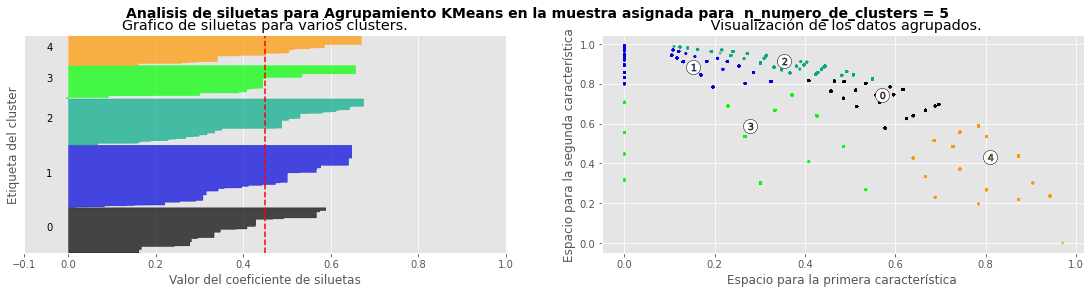

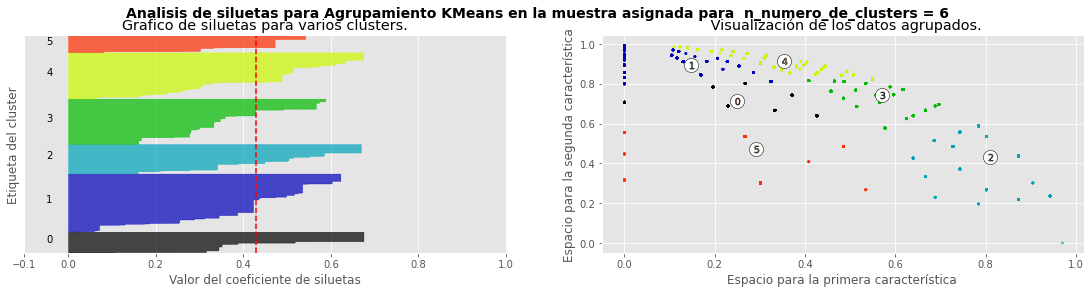

In [28]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

colors_k_means = ['cyan','purple','orange']
range_n_clusters = [2, 3, 4, 5, 6]

X = semillas_3D / semillas_3D2

for n_clusters in range_n_clusters:
    # Crea un subgrafico con 1 fila y 2 columnas
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(19, 4)

    # el primer subgrafico es el grafico de la silueta
    # El coeficiente de la silueta puede oscilar entre [-1,1] pero para
    # este ejemplo , el rango oscilara entre[-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # los  (n_numero_de_clusters+1)*10 es para insertar un espacio en blanco entre los
    #  graficos de las siluetas de cada cluster individual, para delimitarlos
    # claramente
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Inicializar el clusterer con el valor de n_numero_de_clusters y
    # un generador aleatorio con una semilla de 10 para reproducibilidad
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # El puntaje de las siluetas da un valor promedio para todas las muestras.
    # Esto nos da perspectiva de la densidad y separación de los clusters
    # formados
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("para n numero de clusters =", n_clusters,
          "el puntaje de silueta promedio es :", silhouette_avg)

    # Se computa el puntaje para cada silueta
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Se agregan los puntajes de las siluetas asociados al
        # cluster i, y se ordenan
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Se marcan los graficos de las siluetas con sus respectivos
        # numero de clusters en el medio
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Se computa el nuevo y_lower para el siguiente plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Grafico de siluetas para varios clusters.")
    ax1.set_xlabel("Valor del coeficiente de siluetas")
    ax1.set_ylabel("Etiqueta del cluster")

    # La linea vertical para el puntaje de silueta promedio  para todos los
    # valores
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # se limpia las etiquetas de yaxis y xticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Segundo grafico mostrando los  clusters actuales que se forman
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # etiquetando los clusters
    len_ = np.sqrt(np.square(clusterer.cluster_centers_).sum(axis=1)[:,None])
    centers = clusterer.cluster_centers_ / len_
    # Dibujar circulos blancos con su numero en los clusters
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title(" Visualización de los datos agrupados.")
    ax2.set_xlabel("Espacio para la primera característica ")
    ax2.set_ylabel("Espacio para la segunda característica")

    plt.suptitle(("Analisis de siluetas para Agrupamiento KMeans en la muestra asignada "
                  "para  n_numero_de_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


In [30]:
semillas_3D=X

In [47]:
kmeans_model_3D = KMeans(n_clusters=3, max_iter=1000).fit(semillas_3D)
labels_3D = kmeans_model_3D.labels_
centroids_3D = kmeans_model_3D.cluster_centers_


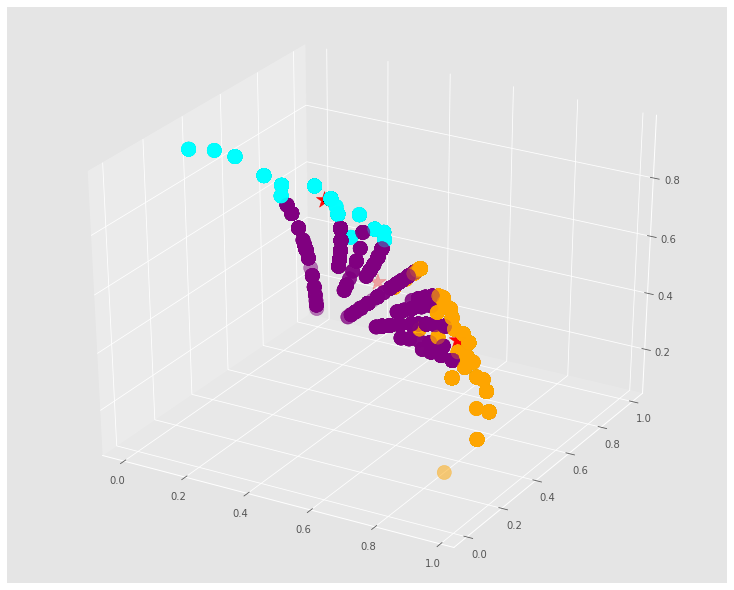

In [48]:
fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig)
ax.scatter(semillas_3D[:, 0], semillas_3D[:, 1], semillas_3D[:, 2], c=labels_3D, s=200,
           cmap=matplotlib.colors.ListedColormap(colors_k_means), alpha=0.5)
ax.scatter(centroids_3D[:, 0], centroids_3D[:, 1], centroids_3D[:, 2], marker='*', c='r', s=300)
plt.show()


In [49]:
# Aquí se muestra un arrays donde se clasifican los datos en los 3 clusters seleccionados del dendograma.
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
ayuda=cluster.fit(bd2)
labels_2D=ayuda.labels_

In [50]:
model=AgglomerativeClustering(n_clusters=3, linkage='ward')

data_fit_3=model.fit(rr)
lab_3c=data_fit_3.labels_


In [52]:

rr['Labels_3Clusters']=lab_3c
rr.describe()


,UNITID,OPEID,opeid6,HCM2,main,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,st_fips,region,CURROPER,Labels_3Clusters
count,7804.000000,7804.000000,7804.000000,7.804000e+03,7.804000e+03,7.804000e+03,7.804000e+03,7.804000e+03,7.804000e+03,7.804000e+03,7804.000000,7.804000e+03,7804.000000
mean,0.346797,0.870310,0.008552,6.175997e-09,1.234350e-06,6.566864e-06,3.396276e-06,4.209616e-06,2.522222e-06,3.742427e-05,0.000006,1.398551e-06,0.704382
std,0.272325,0.219246,0.002415,1.181218e-07,1.599338e-06,2.365323e-05,4.513734e-06,5.643259e-06,2.473787e-06,3.842534e-05,0.000009,1.542336e-06,0.572671
min,0.005079,0.003180,0.000030,0.000000e+00,0.000000e+00,4.137441e-08,0.000000e+00,0.000000e+00,2.070995e-08,1.919357e-08,0.000000,0.000000e+00,0.000000
25%,0.113601,0.826832,0.008169,0.000000e+00,0.000000e+00,4.379909e-07,3.793505e-07,3.992498e-07,7.905861e-07,6.814541e-06,0.000001,2.979595e-07,0.000000
50%,0.211374,0.977356,0.009741,0.000000e+00,4.253391e-07,1.571546e-06,9.897076e-07,1.181409e-06,1.388988e-06,1.898503e-05,0.000003,7.620714e-07,1.000000
75%,0.562389,0.993477,0.009931,0.000000e+00,2.213187e-06,3.670528e-06,5.729350e-06,6.903315e-06,3.535601e-06,6.258869e-05,0.000008,2.278063e-06,1.000000
max,0.999995,0.999987,0.009997,6.576978e-06,7.040810e-06,5.034992e-04,2.560949e-05,2.816324e-05,1.999931e-05,1.851214e-04,0.000054,7.040810e-06,2.000000


GRUPO 0:
     UNITID     OPEID    opeid6  HCM2      main  NUMBRANCH   PREDDEG  \
0  0.708686  0.705489  0.007055   0.0  0.000007   0.000007  0.000021   
1  0.691337  0.722496  0.007225   0.0  0.000007   0.000007  0.000021   
3  0.690463  0.723332  0.007233   0.0  0.000007   0.000007  0.000021   
4  0.707876  0.706302  0.007063   0.0  0.000007   0.000007  0.000021   
5  0.691995  0.721866  0.007219   0.0  0.000007   0.000007  0.000021   

    HIGHDEG   CONTROL   st_fips    region  CURROPER  Labels_3Clusters  
0  0.000028  0.000007  0.000007  0.000035  0.000007                 0  
1  0.000027  0.000007  0.000007  0.000034  0.000007                 0  
3  0.000027  0.000007  0.000007  0.000034  0.000007                 0  
4  0.000028  0.000007  0.000007  0.000035  0.000007                 0  
5  0.000027  0.000007  0.000007  0.000034  0.000007                 0  
(2774, 13)
            UNITID        OPEID       opeid6          HCM2         main  \
count  2774.000000  2774.000000  2774.00

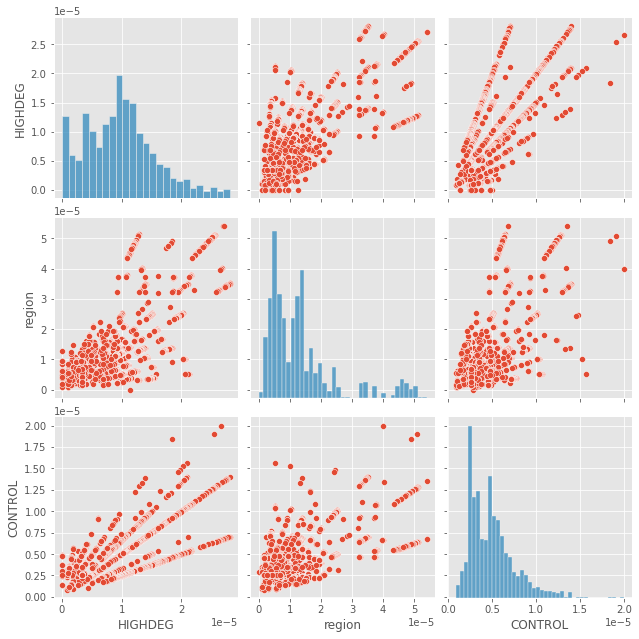

In [53]:

#Grupo 0
print("GRUPO 0:")
is_G=rr.loc[:, 'Labels_3Clusters']==0
C3_G=rr[is_G]
print(C3_G.head())
print(C3_G.shape)
print(C3_G.describe())
sb.pairplot(C3_G,
            height=3,
            vars=['HIGHDEG','region','CONTROL'],
            kind='scatter')
plt.show()

GRUPO 1:
      UNITID     OPEID    opeid6  HCM2          main     NUMBRANCH   PREDDEG  \
2   0.040187  0.999142  0.009991   0.0  3.991141e-07  3.991141e-07  0.000001   
8   0.120446  0.992670  0.009927   0.0  1.194549e-06  1.194549e-06  0.000004   
11  0.082644  0.996529  0.009965   0.0  8.180342e-07  8.180342e-07  0.000002   
12  0.095327  0.995396  0.009954   0.0  9.431460e-07  9.431460e-07  0.000003   
13  0.077313  0.996957  0.009970   0.0  0.000000e+00  1.223348e-05  0.000002   

     HIGHDEG       CONTROL       st_fips    region      CURROPER  \
2   0.000002  7.982282e-07  3.991141e-07  0.000002  3.991141e-07   
8   0.000005  1.194549e-06  1.194549e-06  0.000006  1.194549e-06   
11  0.000002  8.180342e-07  8.180342e-07  0.000004  8.180342e-07   
12  0.000003  1.886292e-06  9.431460e-07  0.000005  9.431460e-07   
13  0.000003  2.293778e-06  7.645927e-07  0.000004  7.645927e-07   

    Labels_3Clusters  
2                  1  
8                  1  
11                 1  
12       

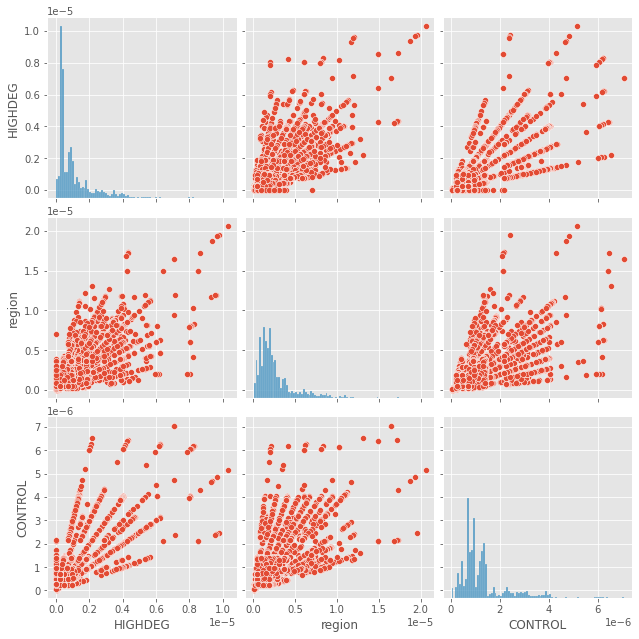

In [54]:

#Grupo 1
print("GRUPO 1:")
is_G=rr.loc[:, 'Labels_3Clusters']==1
C3_G=rr[is_G]
print(C3_G.head())
print(C3_G.shape)
print(C3_G.describe())
sb.pairplot(C3_G,
            height=3,
            vars=['HIGHDEG','region','CONTROL'],
            kind='scatter')
plt.show()

GRUPO 2:
        UNITID     OPEID    opeid6  HCM2  main  NUMBRANCH   PREDDEG   HIGHDEG  \
4465  0.929687  0.368331  0.003683   0.0   0.0   0.000005  0.000010  0.000010   
4800  0.933634  0.358209  0.003582   0.0   0.0   0.000007  0.000005  0.000010   
4890  0.966488  0.256698  0.002567   0.0   0.0   0.000012  0.000007  0.000009   
5129  0.941808  0.336135  0.003361   0.0   0.0   0.000007  0.000002  0.000009   
5151  0.968008  0.250907  0.002509   0.0   0.0   0.000005  0.000002  0.000005   

       CONTROL   st_fips    region  CURROPER  Labels_3Clusters  
4465  0.000003  0.000028  0.000005  0.000003                 2  
4800  0.000007  0.000029  0.000012  0.000002                 2  
4890  0.000002  0.000009  0.000014  0.000002                 2  
5129  0.000007  0.000027  0.000011  0.000002                 2  
5151  0.000002  0.000012  0.000012  0.000002                 2  
(467, 13)
           UNITID       OPEID      opeid6          HCM2          main  \
count  467.000000  467.000000  

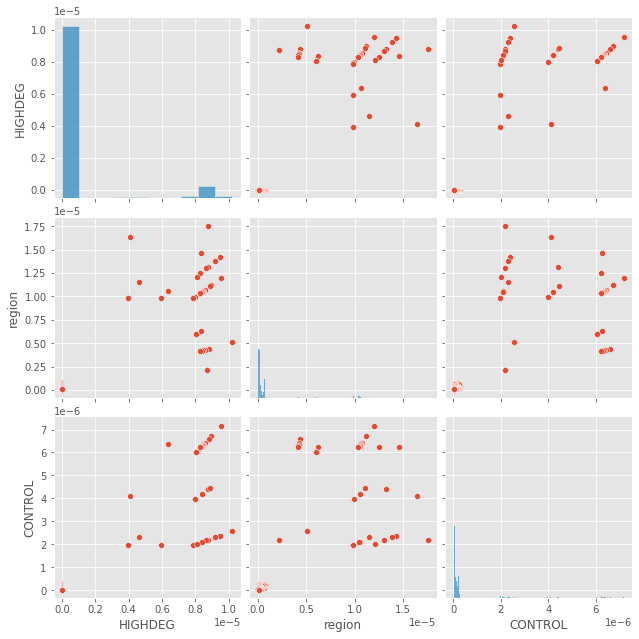

In [46]:
#Grupo 2
print("GRUPO 2:")
is_G=rr.loc[:, 'Labels_3Clusters']==2
C3_G=rr[is_G]
print(C3_G.head())
print(C3_G.shape)
print(C3_G.describe())
sb.pairplot(C3_G,
            height=3,
            vars=['HIGHDEG','region','CONTROL'],
            kind='scatter')
plt.show()